# Does proximity to amenities impacts the rental price for a property in Aberdeen?

## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
    
1. [A description of the problem and a discussion of the background](#0)<br>
2. [Data sources](#1)<br>
3. [Data scraping and handling null values](#2)<br>
4. [Data Analysis](#3)<br>
5. [Downloading and analysing the FourSquare data against rental properties](#4)<br>
6. [Conclusion](#5)<br>

</div>
<hr>

## A description of the problem and a discussion of the background.<a id="0"></a>

**Introduction/ Business Problem**

I have been renting in Aberdeen, Scotland for nearly 9 years and one thing I could never fully comprehend was the rental price. I would find 2 properties in close proximity to each other, and which to me seemed to be fairly similar, but with very different asking prices. 

It got me thinking: 'What actually determines the rental price for a property in Aberdeen?'. Is it the location? Maybe the square footage or EPC band? What about it's proximity to amenities such as shops, cafes and restaurants? There is surprisingly less data publicly available on this matter than compared to that accessible to home buyers.

As part of the IBM Data Science Professional Certificate, this project required the use of FourSquare data. The analysis therefore looks at the relationship between the rental prices of properties in Aberdeen and their proximity to amenities clusters.

**Target audience**

The conclusions of this mini-research are meant to give my fellow renters some insight into rental prices in Aberdeen and what most impacts them. This in turn is meant to aid them into deciding on what to focus in their searches.

## Data sources<a id="1"></a>

The below data sources used for analysis have also been made available on my Github repository:
https://github.com/alex-spencer03/Coursera_Capstone.

1.	Data of rental properties available for rent: This was scraped from the Aberdeen Solicitors Property Centre’s (ASPC) website on the 15th July 2020: https://www.aspc.co.uk/.
2. Venue data from FourSquare's API

A full explanation of each dataset and features can be found in the final report available via the above GitHub link.

## Data scraping and handling null values<a id="2"></a>

In [1]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import json
import requests

In [2]:
url = 'https://www.aspc.co.uk/search/?PrimaryPropertyType=Rent&SortBy=PublishedDesc&LastUpdated=AddedAnytime&SearchTerm=&PropertyType=Residential&PriceMin=&PriceMax=&Bathrooms=&OrMoreBathrooms=true&Bedrooms=&OrMoreBedrooms=true&HasCentralHeating=false&HasGarage=false&HasDoubleGarage=false&HasGarden=false&IsNewBuild=false&IsDevelopment=false&IsParkingAvailable=false&IsPartExchangeConsidered=false&PublicRooms=&OrMorePublicRooms=true&IsHmoLicense=false&IsAllowPets=false&IsAllowSmoking=false&IsFullyFurnished=false&IsPartFurnished=false&IsUnfurnished=false&ExcludeUnderOffer=false&IncludeClosedProperties=true&ClosedDatesSearch=14&MapSearchType=EDITED&ResultView=LIST&ResultMode=NONE&AreaZoom=13&AreaCenter[lat]=57.14955426557916&AreaCenter[lng]=-2.0927401123046785&EditedZoom=13&EditedCenter[lat]=57.14955426557916&EditedCenter[lng]=-2.0927401123046785'
api_url = 'https://api.aspc.co.uk/Property/GetProperties?{}&Sort=PublishedDesc&Page=1&PageSize=639'

params = url.split('?')[-1]
data = requests.get(api_url.format(params)).json()

#print(json.dumps(data, indent=4))

In [3]:
# creating the initial pandas dataframe
column_names=['First_line','Second_line','City','Postcode','Bedrooms','Bathrooms','Lounges','Price','Square_ft','Property_type','Description','Coordinates']
properties = pd.DataFrame(columns=column_names)
properties

,First_line,Second_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Description,Coordinates


In [4]:
# pulling the required info for each column
for property_ in data:
    first_line=property_['Location']['AddressLine1']
    second_line=property_['Location']['LineTwoLocation']
    city=property_['Location']['City']
    postcode=property_['Location']['Postcode']
    bedrooms=property_['Bedrooms']
    bathrooms=property_['Bathrooms']
    lounges=property_['PublicRooms']
    price=property_['Price']
    square_ft=property_['FloorArea']
    property_type=property_['PropertyIconKey']
    description=property_['CategorisationDescription']
    coordinates=property_['Location']['Spatial']['Geography']['WellKnownText']
    
# amending the existing dataframe with required info
    properties=properties.append({'First_line': first_line,
                                 'Second_line':second_line,
                                 'City': city,
                                 'Postcode': postcode,
                                 'Bedrooms': bedrooms,
                                 'Bathrooms': bathrooms,
                                 'Lounges': lounges,
                                 'Price': price,
                                 'Square_ft': square_ft,
                                 'Property_type': property_type,
                                 'Description': description,
                                 'Coordinates': coordinates}, ignore_index=True)
print('done')

done


In [5]:
properties.head()

,First_line,Second_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Description,Coordinates
0,1 Forest Road,"Aberdeen, AB15 4DE",Aberdeen,AB15 4DE,5,2,2,1700.0,0.0,HOUSE_TERRACED,Unfurnished 5 Bdrm Terraced Dwellhouse (End Te...,POINT (-2.13323988718378 57.1420979920041)
1,16 Smithfield,"Kintore, Inverurie, AB51 0YN",Inverurie,AB51 0YN,1,1,1,425.0,44.0,FLAT,Fully furnished 1 Bdrm 1st flr Flat. Hall. Lou...,POINT (-2.3482168 57.239376)
2,47 Claremont Grove,"Aberdeen, AB10 6RF",Aberdeen,AB10 6RF,2,1,1,600.0,0.0,FLAT,Fully furnished 2 Bdrm Top flr Flat. V/bule. H...,POINT (-2.12107779999997 57.1391735)
3,"Flat 2, Crichie House","Stuartfield, Peterhead, AB42 5DY",Peterhead,AB42 5DY,1,1,1,445.0,0.0,FLAT,Fully furnished 1 Bdrm 2nd flr Flat. Lounge. K...,POINT (-2.03872569999999 57.4972342)
4,"The Stables, Crichie House","Stuartfield, Peterhead, AB42 5DY",Peterhead,AB42 5DY,2,1,1,575.0,0.0,HOUSE_TERRACED,Unfurnished 2 Bdrm Terraced Dwellhouse (part o...,POINT (-2.03872569999999 57.4972342)


In [6]:
properties.shape

(638, 12)

### Data cleaning and handling null values

In [7]:
import re  #very useful for defining search patterns

# creating the Council tax, EPC band, Garden and Parking columns by extracting the data from the Description column
# note to self: (?i) case insensitive modifier

properties['Council_tax_band'] = properties['Description'].str.extract(r'(?i)\(((?:CT)[^()*&?%]+)\)', expand=False)
properties['EPC_band'] = properties['Description'].str.extract(r'(?i)\(((?:EPC)[^()*&?%]+)\)', expand=False)
properties['Garden']= properties.Description.str.extract(r'\b(Garden)\b', expand=False)
properties['Parking']= properties.Description.str.extract(r'\b(Parking)\b', expand=False)

#sorting out the latitude and longitude of the properties
properties['Coordinates']=properties.Coordinates.str.strip('POINT (')
properties['Coordinates']=properties.Coordinates.str.strip(')')
properties['Longitude'], properties['Latitude']= properties['Coordinates'].str.split(' ',1).str

#dropping columns no longer required
properties.drop(['Description'], axis=1, inplace=True)
properties.drop(['Second_line'], axis=1, inplace=True)
properties.drop(['Coordinates'], axis=1, inplace=True)

properties.head()

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
0,1 Forest Road,Aberdeen,AB15 4DE,5,2,2,1700.0,0.0,HOUSE_TERRACED,CT band - G,EPC band - D,NaN,NaN,-2.13323988718378,57.1420979920041
1,16 Smithfield,Inverurie,AB51 0YN,1,1,1,425.0,44.0,FLAT,CT band - A,EPC band - D,NaN,NaN,-2.3482168,57.239376
2,47 Claremont Grove,Aberdeen,AB10 6RF,2,1,1,600.0,0.0,FLAT,CT Band - C,EPC band - D,NaN,Parking,-2.12107779999997,57.1391735
3,"Flat 2, Crichie House",Peterhead,AB42 5DY,1,1,1,445.0,0.0,FLAT,CT Band - A,EPC band - F,NaN,NaN,-2.03872569999999,57.4972342
4,"The Stables, Crichie House",Peterhead,AB42 5DY,2,1,1,575.0,0.0,HOUSE_TERRACED,CT Band - B,EPC band - E,Garden,Parking,-2.03872569999999,57.4972342


In [8]:
properties['Council_tax_band'].value_counts()

CT band - A       67
CT Band - D       62
CT band - D       60
CT band - B       60
CT Band - C       52
CT Band - B       50
CT Band - A       48
CT band - TBC     45
CT band - C       40
CT Band - E       34
CT band - E       31
CT Band - TBC     25
CT band - F       18
CT Band - F       10
CT Band - G       10
CT band - G        5
CT Band - H        3
CT band -TBC       2
CT - band TBC      2
CT Band - TBC      2
CT band - H        2
CT band A          2
CT band -F         1
CT band B          1
CT band - TBC      1
CT band -E         1
Ct band - C        1
Name: Council_tax_band, dtype: int64

### Because the `Council_tax_band` strings pulled from ASPC's API are not consistent further work is required on them.

In [9]:
#striping down council tax data
properties['Council_tax_band']=properties.Council_tax_band.str.rstrip()
properties['Council_tax_band']=properties.Council_tax_band.str.replace('band', 'Band')
properties['Council_tax_band']=properties.Council_tax_band.str.replace('CT - Band TBC','CT Band - TBC')
properties['Council_tax_band']=properties.Council_tax_band.str.replace('CT BandTBC','CT Band - TBC')
properties['Council_tax_band']=properties.Council_tax_band.str.replace('CT Band -E','CT Band - E')
properties['Council_tax_band']=properties.Council_tax_band.str.replace('CT Band -F','CT Band - F')
properties['Council_tax_band']=properties.Council_tax_band.str.replace(' -','')

properties['EPC_band']=properties.EPC_band.str.replace(' -','')

#making property_type entries more pleasent to view
properties['Property_type']=properties.Property_type.str.replace('FLAT', 'Flat')
properties['Property_type']=properties.Property_type.str.replace('HOUSE_SEMI_DETACHED', 'House Semi Detached')
properties['Property_type']=properties.Property_type.str.replace('HOUSE_DETACHED', 'House Detached')
properties['Property_type']=properties.Property_type.str.replace('HOUSE_TERRACED', 'House Terraced')

properties.head()

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
0,1 Forest Road,Aberdeen,AB15 4DE,5,2,2,1700.0,0.0,House Terraced,CT Band G,EPC band D,NaN,NaN,-2.13323988718378,57.1420979920041
1,16 Smithfield,Inverurie,AB51 0YN,1,1,1,425.0,44.0,Flat,CT Band A,EPC band D,NaN,NaN,-2.3482168,57.239376
2,47 Claremont Grove,Aberdeen,AB10 6RF,2,1,1,600.0,0.0,Flat,CT Band C,EPC band D,NaN,Parking,-2.12107779999997,57.1391735
3,"Flat 2, Crichie House",Peterhead,AB42 5DY,1,1,1,445.0,0.0,Flat,CT Band A,EPC band F,NaN,NaN,-2.03872569999999,57.4972342
4,"The Stables, Crichie House",Peterhead,AB42 5DY,2,1,1,575.0,0.0,House Terraced,CT Band B,EPC band E,Garden,Parking,-2.03872569999999,57.4972342


In [10]:
properties['Council_tax_band'].value_counts()

CT Band D      122
CT Band A      117
CT Band B      111
CT Band C       92
CT Band TBC     75
CT Band E       66
CT Band F       29
CT Band G       15
CT Band H        5
CT BandTBC       2
Ct Band C        1
Name: Council_tax_band, dtype: int64

#### Much better

In [11]:
aberdeen=properties[properties['City'] == 'Aberdeen'].reset_index(drop=True)
aberdeen.head()

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
0,1 Forest Road,Aberdeen,AB15 4DE,5,2,2,1700.0,0.0,House Terraced,CT Band G,EPC band D,NaN,NaN,-2.13323988718378,57.1420979920041
1,47 Claremont Grove,Aberdeen,AB10 6RF,2,1,1,600.0,0.0,Flat,CT Band C,EPC band D,NaN,Parking,-2.12107779999997,57.1391735
2,"Flat B, 49 Summer Street",Aberdeen,AB10 1SB,2,1,1,650.0,64.0,Flat,CT Band D,EPC band C,NaN,Parking,-2.1092704,57.1453614
3,"Flat 21, 10 Whitehall Place",Aberdeen,AB25 2NX,3,2,1,625.0,0.0,Flat,CT Band TBC,EPC band D,NaN,NaN,-2.11563361642252,57.1479132255195
4,"Flat 11, 10 Whitehall Place",Aberdeen,AB25 2NX,3,2,1,625.0,0.0,Flat,CT Band TBC,EPC band D,NaN,NaN,-2.1156746,57.1479244


In [12]:
aberdeen.shape

(467, 15)

In [13]:
aberdeen_master=aberdeen[aberdeen['City'] == 'Aberdeen'].reset_index(drop=True)
aberdeen_master.shape

(467, 15)

### Now that we have a set dataframe we need to investigate and handle any null values which will impact the analysis

In [14]:
#checking the entire dataframe for null values
aberdeen_master.isnull().sum()

First_line            0
City                  0
Postcode              0
Bedrooms              0
Bathrooms             0
Lounges               0
Price                 0
Square_ft             0
Property_type         0
Council_tax_band      2
EPC_band              1
Garden              344
Parking             200
Longitude             0
Latitude              0
dtype: int64

In [15]:
#checking which properties do not have a council tax entry
aberdeen_master[aberdeen_master['Council_tax_band'].isnull()]

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
456,"26C, Castle Street",Aberdeen,AB11 5BG,1,1,1,500.0,0.0,Flat,NaN,EPC band D,NaN,NaN,-2.09208739999997,57.1484411
466,10 Edgehill Terrace,Aberdeen,AB15 5HA,4,2,4,1750.0,237.0,House Detached,NaN,EPC band D,Garden,Parking,-2.14518050000004,57.1474217


In [16]:
#checking which properties do not have an EPC entry
aberdeen_master[aberdeen_master['EPC_band'].isnull()]

#NOTE: unable to locate details for either Square_ft, CT or EPC. Remove entry

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
132,10 Whitehall Place,Aberdeen,AB25 2NX,1,1,1,395.0,0.0,Flat,CT Band TBC,NaN,NaN,NaN,-2.11567460000001,57.1478894794266


In [17]:
#checking properties with no Square_ft data
aberdeen_master.loc[aberdeen_master['Square_ft'] == 0]

,First_line,City,Postcode,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Garden,Parking,Longitude,Latitude
0,1 Forest Road,Aberdeen,AB15 4DE,5,2,2,1700.0,0.0,House Terraced,CT Band G,EPC band D,NaN,NaN,-2.13323988718378,57.1420979920041
1,47 Claremont Grove,Aberdeen,AB10 6RF,2,1,1,600.0,0.0,Flat,CT Band C,EPC band D,NaN,Parking,-2.12107779999997,57.1391735
3,"Flat 21, 10 Whitehall Place",Aberdeen,AB25 2NX,3,2,1,625.0,0.0,Flat,CT Band TBC,EPC band D,NaN,NaN,-2.11563361642252,57.1479132255195
4,"Flat 11, 10 Whitehall Place",Aberdeen,AB25 2NX,3,2,1,625.0,0.0,Flat,CT Band TBC,EPC band D,NaN,NaN,-2.1156746,57.1479244
5,"Flat 12, 108 Rosemount Viaduct",Aberdeen,AB25 1NU,3,2,1,625.0,0.0,Flat,CT Band TBC,EPC band E,NaN,NaN,-2.11006615367842,57.148992311407
6,"Flat 42, 108 Rosemount Viaduct",Aberdeen,AB25 1NX,2,2,1,575.0,0.0,Flat,CT Band TBC,EPC band F,NaN,NaN,-2.11000478505048,57.1488815
7,"First Floor Left, 24 Northfield Place",Aberdeen,AB25 1SD,2,1,1,500.0,0.0,Flat,CT Band B,EPC band C,Garden,NaN,-2.11245129999998,57.1481742
8,1e Summer Street,Aberdeen,AB24 4EY,5,2,1,1500.0,0.0,Flat,CT Band TBC,EPC band B,NaN,Parking,-2.1249352,57.1687273
10,12 Maberly Street,Aberdeen,AB25 1NB,2,1,1,450.0,0.0,Flat,CT Band C,EPC band D,NaN,NaN,-2.10478520000004,57.1522859
14,68 Beechgrove Avenue,Aberdeen,AB15 5EJ,2,3,1,1395.0,0.0,Flat,CT Band F,EPC band C,NaN,Parking,-2.12869878465577,57.1494959176471


In [18]:
prop_sqft=pd.DataFrame((aberdeen_master.loc[aberdeen_master['Square_ft'] > 0])).reset_index(drop=True)
prop_sqft[['Price','Square_ft']].corr()

,Price,Square_ft
Price,1.000000,0.855485
Square_ft,0.855485,1.000000


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0, 2404.0408269872873)

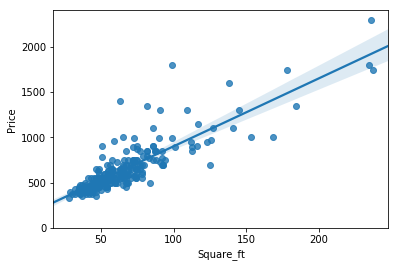

In [20]:
sns.regplot(x="Square_ft", y="Price", data=prop_sqft)
plt.ylim(0,)

### Important: this data was initially pulled on 15th July 2020 and the above code was for illustrative purposes only.

Just as can be seen now the number of properties without square footage values is high (228). To obtain this data would have been very time consuming and I had to deternine if it had any value to bring to justify the time and resources to obtain it.

As can be seen in the above .corr() function there is a 0.851765 correlation between the price and the square footage of the property. The above scatter plot confirms this. Not including this data could have skewed the final results.

The initial properties dataset was persisted to DB2 Warehouse on 15th July 2020 and will be pulled below.

## Data Analysis<a id="3"></a>

In [21]:
import ibm_db
import ibm_db_dbi

#DB2 Warehouse credentials
dsn_driver = "{IBM DB2 ODBC DRIVER}"
dsn_database = "BLUDB" #check if credentials changed
dsn_hostname = "dashdb-txn-sbox-yp-lon02-07.services.eu-gb.bluemix.net" #check if credentials changed
dsn_port = "50000" #check if credentials changed
dsn_protocol = "TCPIP" #check if credentials changed
dsn_uid = "blq76381" #check if credentials changed
dsn_pwd = "78rdpd^7rt9l1d6j" #check if credentials changed

#creating connection
dsn = (
"DRIVER={0};"
"DATABASE={1};"
"HOSTNAME={2};"
"PORT={3};"
"PROTOCOL={4};"
"UID={5};"
"PWD={6};").format(dsn_driver, dsn_database, dsn_hostname, dsn_port, dsn_protocol,
dsn_uid, dsn_pwd)

#sanity check
try:
    conn = ibm_db.connect(dsn, "", "")
    print ("Connected to database: ", dsn_database, "as user: ", dsn_uid, "on host: ", dsn_hostname)

except:
    print ("Unable to connect: ", ibm_db.conn_errormsg() )

Connected to database:  BLUDB as user:  blq76381 on host:  dashdb-txn-sbox-yp-lon02-07.services.eu-gb.bluemix.net


In [22]:
import pandas
import ibm_db_dbi

#connection for pandas
pconn = ibm_db_dbi.Connection(conn)

#query statement to retrieve all rows in aberdeen table
selectQuery = "select * from ABERDEEN_MASTER"

#retrieve the query results into a pandas dataframe
aberdeen_master = pd.read_sql(selectQuery, pconn)
#aberdeen_master.drop(['index'], axis=1, inplace=True)

#sanity check
aberdeen_master.head()

,First_line,City,Postcode,Council_ward,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Property_type,Council_tax_band,EPC_band,Parking,Longitude,Latitude
0,2 Albert Den,Aberdeen,AB25 1YX,Midstocket/Rosemount,2,2,1,750,75,Flat,CT Band E,EPC band C,Parking,-2.117279,57.146122
1,3c Anderson Drive,Aberdeen,AB15 4ST,Airyhall/Broomhill/Garthdee,2,2,1,750,82,Flat,CT Band E,EPC band C,Parking,-2.134406,57.133631
2,11 Cypress Avenue,Aberdeen,AB23 8LA,Bridge of Don,2,1,1,625,69,House Semi Detached,CT Band C,EPC band C,Parking,-2.100589,57.199485
3,"First Floor Left, 31 Bank Street",Aberdeen,AB11 7TA,Torry/Ferryhill,1,1,1,475,46,Flat,CT Band B,EPC band C,Parking,-2.100533,57.138016
4,66 Ashgrove Road,Aberdeen,AB25 3AD,Midstocket/Rosemount,2,1,1,550,53,Flat,CT Band B,EPC band D,None,-2.119067,57.158794


In [23]:
#sanity check after importing table into pandas df
aberdeen_master.shape

(446, 15)

In [24]:
#sanity check
print(aberdeen_master.dtypes)

First_line           object
City                 object
Postcode             object
Council_ward         object
Bedrooms              int64
Bathrooms             int64
Lounges               int64
Price                 int64
Square_ft             int64
Property_type        object
Council_tax_band     object
EPC_band             object
Parking              object
Longitude           float64
Latitude            float64
dtype: object


In [25]:
aberdeen_master.drop(['City'], axis=1, inplace=True)

In [26]:
aberdeen_master.describe()

,Bedrooms,Bathrooms,Lounges,Price,Square_ft,Longitude,Latitude
count,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000,446.000000
mean,1.894619,1.215247,1.065022,639.094170,65.964126,-2.117851,57.151481
std,0.834707,0.443014,0.325384,268.684001,32.615962,0.027320,0.016319
min,1.000000,1.000000,0.000000,325.000000,26.000000,-2.263654,57.096120
25%,1.000000,1.000000,1.000000,475.000000,47.000000,-2.126179,57.140279
50%,2.000000,1.000000,1.000000,550.000000,58.000000,-2.112188,57.148793
75%,2.000000,1.000000,1.000000,700.000000,75.000000,-2.100270,57.158662
max,6.000000,3.000000,4.000000,2300.000000,330.000000,-2.078191,57.212590


#### Let's calculate and then visualise the correlation between the numerical variables

In [27]:
aberdeen_master[['Price','Bedrooms','Bathrooms','Lounges','Square_ft','Parking']].corr()

,Price,Bedrooms,Bathrooms,Lounges,Square_ft
Price,1.000000,0.791809,0.647835,0.530821,0.785406
Bedrooms,0.791809,1.000000,0.511176,0.480349,0.728791
Bathrooms,0.647835,0.511176,1.000000,0.308011,0.601473
Lounges,0.530821,0.480349,0.308011,1.000000,0.616610
Square_ft,0.785406,0.728791,0.601473,0.616610,1.000000


In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

(0, 2400.1044507652377)

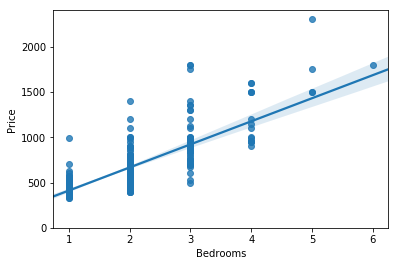

In [29]:
sns.regplot(x='Bedrooms', y='Price', data=aberdeen_master)
plt.ylim(0,)

(0, 2399.816920455558)

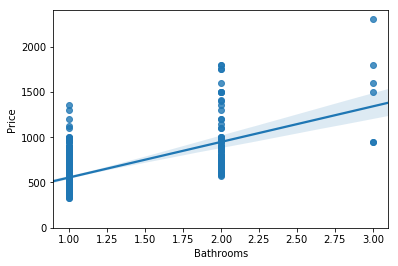

In [30]:
sns.regplot(x='Bathrooms', y='Price', data=aberdeen_master)
plt.ylim(0,)

(0, 2527.3108201944956)

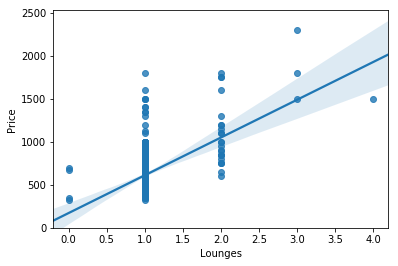

In [31]:
sns.regplot(x='Lounges', y='Price', data=aberdeen_master)
plt.ylim(0,)

(0, 3012.524568216966)

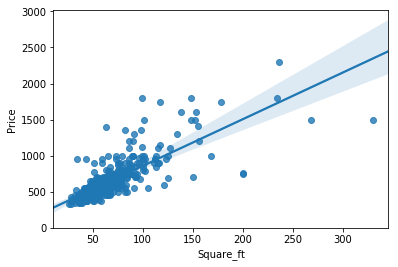

In [32]:
sns.regplot(x='Square_ft', y='Price', data=aberdeen_master)
plt.ylim(0,)

#### Calculating and visualising the correlation between the categorical variables

[Text(0, 0, 'CT Band E'),
 Text(0, 0, 'CT Band C'),
 Text(0, 0, 'CT Band B'),
 Text(0, 0, 'CT Band F'),
 Text(0, 0, 'CT Band D'),
 Text(0, 0, 'CT Band A'),
 Text(0, 0, 'CT Band H'),
 Text(0, 0, 'CT Band G')]

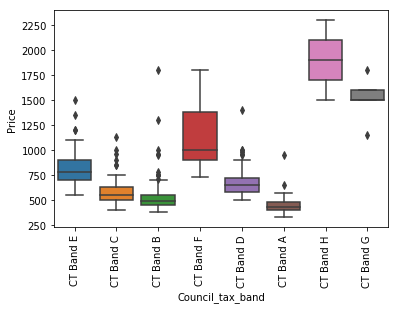

In [33]:
ax=sns.boxplot(x="Council_tax_band", y="Price", data=aberdeen_master)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'EPC band C'),
 Text(0, 0, 'EPC band D'),
 Text(0, 0, 'EPC band B'),
 Text(0, 0, 'EPC band E'),
 Text(0, 0, 'EPC band F'),
 Text(0, 0, 'EPC band G')]

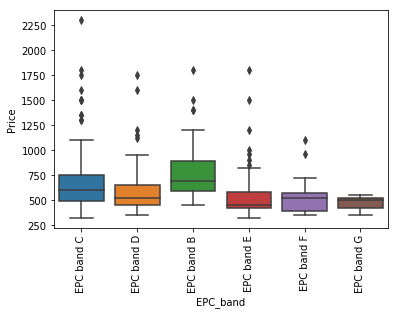

In [34]:
ax=sns.boxplot(x="EPC_band", y="Price", data=aberdeen_master)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

[Text(0, 0, 'Midstocket/Rosemount'),
 Text(0, 0, 'Airyhall/Broomhill/Garthdee'),
 Text(0, 0, 'Bridge of Don'),
 Text(0, 0, 'Torry/Ferryhill'),
 Text(0, 0, 'Lower Deeside'),
 Text(0, 0, 'Hazlehead/Queens Cross/Countesswells'),
 Text(0, 0, 'George St/Harbour'),
 Text(0, 0, 'Kingswells/Sheddocksley/Summerhill'),
 Text(0, 0, 'Dyce/Bucksburn/Danestone'),
 Text(0, 0, 'Tillydrone/Seaton/Old Aberdeen'),
 Text(0, 0, 'Hilton/Woodside/Stockethill'),
 Text(0, 0, 'Northfield/Mastrick North'),
 Text(0, 0, 'Kincorth/Nigg/Cove')]

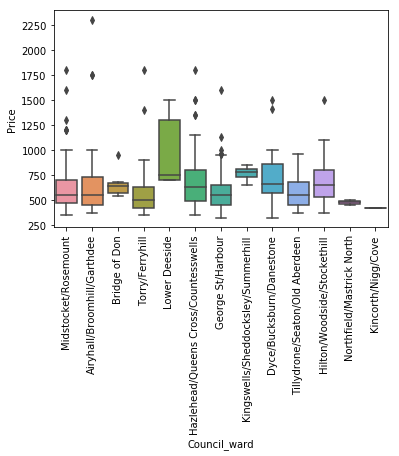

In [35]:
ax=sns.boxplot(x="Council_ward", y="Price", data=aberdeen_master)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [36]:
#applying one-hot encoding to the categorical variables for further analysis
for column in ['Property_type','Council_tax_band','EPC_band','Parking']:
    dummies = pd.get_dummies(aberdeen_master[column])
    aberdeen_master[dummies.columns] = dummies

In [37]:
aberdeen_master[['Price','CT Band A', 'CT Band B', 'CT Band C', 'CT Band D', 'CT Band E', 'CT Band F', 'CT Band G', 'CT Band H']].corr()

,Price,CT Band A,CT Band B,CT Band C,CT Band D,CT Band E,CT Band F,CT Band G,CT Band H
Price,1.000000,-0.375616,-0.195710,-0.093564,0.078062,0.243886,0.450128,0.345527,0.315320
CT Band A,-0.375616,1.000000,-0.263328,-0.231483,-0.273790,-0.178663,-0.117244,-0.053538,-0.033746
CT Band B,-0.195710,-0.263328,1.000000,-0.241115,-0.285182,-0.186097,-0.122122,-0.055766,-0.035150
CT Band C,-0.093564,-0.231483,-0.241115,1.000000,-0.250694,-0.163592,-0.107354,-0.049022,-0.030899
CT Band D,0.078062,-0.273790,-0.285182,-0.250694,1.000000,-0.193490,-0.126974,-0.057981,-0.036546
CT Band E,0.243886,-0.178663,-0.186097,-0.163592,-0.193490,1.000000,-0.082857,-0.037836,-0.023848
CT Band F,0.450128,-0.117244,-0.122122,-0.107354,-0.126974,-0.082857,1.000000,-0.024829,-0.015650
CT Band G,0.345527,-0.053538,-0.055766,-0.049022,-0.057981,-0.037836,-0.024829,1.000000,-0.007146
CT Band H,0.315320,-0.033746,-0.035150,-0.030899,-0.036546,-0.023848,-0.015650,-0.007146,1.000000


In [38]:
aberdeen_master[['Price','EPC band B','EPC band C','EPC band D','EPC band E','EPC band F','EPC band G']].corr()

,Price,EPC band B,EPC band C,EPC band D,EPC band E,EPC band F,EPC band G
Price,1.000000,0.173624,0.136696,-0.156957,-0.084807,-0.064120,-0.052870
EPC band B,0.173624,1.000000,-0.270411,-0.216743,-0.114030,-0.062483,-0.025830
EPC band C,0.136696,-0.270411,1.000000,-0.594887,-0.312976,-0.171495,-0.070895
EPC band D,-0.156957,-0.216743,-0.594887,1.000000,-0.250860,-0.137459,-0.056825
EPC band E,-0.084807,-0.114030,-0.312976,-0.250860,1.000000,-0.072318,-0.029896
EPC band F,-0.064120,-0.062483,-0.171495,-0.137459,-0.072318,1.000000,-0.016382
EPC band G,-0.052870,-0.025830,-0.070895,-0.056825,-0.029896,-0.016382,1.000000


#### Let's investigate a bit more the relationship between the different variables by looking at the average prices

In [39]:
test_one=aberdeen_master[['Bedrooms','Bathrooms','Lounges','Square_ft','Price']]
ab_avg_price=test_one.groupby(['Bedrooms','Bathrooms','Lounges'], as_index=False).mean()
ab_avg_price['Sq_diff']=ab_avg_price['Square_ft'].diff()
ab_avg_price['Price_diff']=ab_avg_price['Price'].diff()
#ab_avg_price.sort_values(by=['Difference'], inplace=True, ascending=False)
ab_avg_price

,Bedrooms,Bathrooms,Lounges,Square_ft,Price,Sq_diff,Price_diff
0,1,1,0,32.500000,337.500000,NaN,NaN
1,1,1,1,45.164384,454.547945,12.664384,117.047945
2,2,1,1,61.182353,581.788235,16.017969,127.240290
3,2,1,2,79.666667,681.666667,18.484314,99.878431
4,2,2,1,80.102041,765.163265,0.435374,83.496599
5,2,2,2,82.000000,895.000000,1.897959,129.836735
6,3,1,0,95.000000,687.500000,13.000000,-207.500000
7,3,1,1,79.000000,856.304348,-16.000000,168.804348
8,3,1,2,91.142857,878.571429,12.142857,22.267081
9,3,2,1,99.200000,955.000000,8.057143,76.428571


#### Now let's see what the average rental property looks like in each council ward

In [40]:
test_one=aberdeen_master[['Council_ward','Bedrooms','Bathrooms','Lounges','Square_ft','Price']]
c_ward_avg=test_one.groupby(['Council_ward'], as_index=False).mean()
c_ward_avg.sort_values(by=['Price'], inplace=True, ascending=False)
c_ward_avg

,Council_ward,Bedrooms,Bathrooms,Lounges,Square_ft,Price
8,Lower Deeside,2.800000,1.600000,1.200000,107.000000,989.000000
7,Kingswells/Sheddocksley/Summerhill,2.750000,1.250000,1.500000,82.250000,762.500000
0,Airyhall/Broomhill/Garthdee,2.090909,1.272727,1.181818,71.954545,742.045455
2,Dyce/Bucksburn/Danestone,2.175000,1.350000,1.125000,86.450000,721.550000
4,Hazlehead/Queens Cross/Countesswells,1.924242,1.303030,1.121212,74.878788,708.181818
5,Hilton/Woodside/Stockethill,2.238095,1.285714,1.095238,72.904762,702.380952
1,Bridge of Don,2.000000,1.166667,1.166667,68.500000,665.000000
9,Midstocket/Rosemount,1.757576,1.257576,1.090909,62.575758,643.712121
11,Tillydrone/Seaton/Old Aberdeen,2.047619,1.047619,0.952381,63.238095,591.904762
3,George St/Harbour,1.831858,1.123894,1.000000,58.716814,577.292035


#### Let's cluster the properties and visualise the clusters

In [41]:
# import k-means from clustering stage
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 3

aberdeen_grouped_clustering = aberdeen_master[['Bedrooms','Bathrooms','Lounges','Square_ft','Price','Latitude','Longitude']]

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(aberdeen_grouped_clustering)

# add clustering labels
aberdeen_grouped_clustering.insert(0, 'Cluster Labels', kmeans.labels_)
aberdeen_grouped_clustering.head()

,Cluster Labels,Bedrooms,Bathrooms,Lounges,Square_ft,Price,Latitude,Longitude
0,1,2,2,1,75,750,57.146122,-2.117279
1,1,2,2,1,82,750,57.133631,-2.134406
2,0,2,1,1,69,625,57.199485,-2.100589
3,0,1,1,1,46,475,57.138016,-2.100533
4,0,2,1,1,53,550,57.158794,-2.119067


In [42]:
import numpy as np # library to handle data in a vectorized manner

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

!conda install -c conda-forge geopy --yes #
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.5 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.50-py_0          conda-forge
    geopy:           

In [43]:
#adding the council_wards into dataframe
council_w=aberdeen_master[['Council_ward','Latitude']]
aberdeen_grouped_clustering=pd.merge(aberdeen_grouped_clustering, council_w, on='Latitude')

# move neighborhood column to the first column
cols = [aberdeen_grouped_clustering.columns[-1]] + list(aberdeen_grouped_clustering.columns[:-1])
aberdeen_grouped_clustering = aberdeen_grouped_clustering[cols]

aberdeen_grouped_clustering.head()

,Council_ward,Cluster Labels,Bedrooms,Bathrooms,Lounges,Square_ft,Price,Latitude,Longitude
0,Midstocket/Rosemount,1,2,2,1,75,750,57.146122,-2.117279
1,Airyhall/Broomhill/Garthdee,1,2,2,1,82,750,57.133631,-2.134406
2,Bridge of Don,0,2,1,1,69,625,57.199485,-2.100589
3,Torry/Ferryhill,0,1,1,1,46,475,57.138016,-2.100533
4,Midstocket/Rosemount,0,2,1,1,53,550,57.158794,-2.119067


In [44]:
#getting the coordinates for Aberdeen city
address = 'Aberdeen, Scotland'

geolocator = Nominatim(user_agent="ab_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Aberdeen, Scotland are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Aberdeen, Scotland are 57.1482429, -2.0928095.


In [45]:
# creating the map of clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# setting the color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# adding the markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(aberdeen_grouped_clustering['Latitude'], aberdeen_grouped_clustering['Longitude'], aberdeen_grouped_clustering['Council_ward'], aberdeen_grouped_clustering['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

#### Finally, let's examine each cluster

In [46]:
#Examining the first cluster of properties
cluster_one=pd.DataFrame(aberdeen_grouped_clustering.loc[aberdeen_grouped_clustering['Cluster Labels'] == 0])
cluster_one.describe()

,Cluster Labels,Bedrooms,Bathrooms,Lounges,Square_ft,Price,Latitude,Longitude
count,332.0,332.000000,332.000000,332.00000,332.000000,332.000000,332.000000,332.000000
mean,0.0,1.521084,1.030120,1.00000,52.448795,504.765060,57.151543,-2.113819
std,0.0,0.518108,0.171177,0.10993,13.372892,83.356144,0.015918,0.022576
min,0.0,1.000000,1.000000,0.00000,26.000000,325.000000,57.096701,-2.190493
25%,0.0,1.000000,1.000000,1.00000,43.000000,445.000000,57.140361,-2.119906
50%,0.0,2.000000,1.000000,1.00000,50.000000,500.000000,57.149014,-2.110062
75%,0.0,2.000000,1.000000,1.00000,60.000000,571.250000,57.157350,-2.099129
max,0.0,3.000000,2.000000,2.00000,121.000000,650.000000,57.212590,-2.078191


In [47]:
#Examining the second cluster of properties
cluster_two=pd.DataFrame(aberdeen_grouped_clustering.loc[aberdeen_grouped_clustering['Cluster Labels'] == 1])
cluster_two.describe()

,Cluster Labels,Bedrooms,Bathrooms,Lounges,Square_ft,Price,Latitude,Longitude
count,129.0,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,1.0,2.488372,1.550388,1.116279,88.620155,831.093023,57.155683,-2.129136
std,0.0,0.674494,0.529759,0.367166,29.516996,131.538103,0.019341,0.036295
min,1.0,1.000000,1.000000,0.000000,34.000000,675.000000,57.096120,-2.263654
25%,1.0,2.000000,1.000000,1.000000,72.000000,725.000000,57.142875,-2.138420
50%,1.0,2.000000,2.000000,1.000000,83.000000,795.000000,57.150886,-2.123921
75%,1.0,3.000000,2.000000,1.000000,97.000000,900.000000,57.165151,-2.103305
max,1.0,4.000000,3.000000,2.000000,200.000000,1200.000000,57.212590,-2.081247


In [48]:
#Examining the third and final cluster of properties
cluster_three=pd.DataFrame(aberdeen_grouped_clustering.loc[aberdeen_grouped_clustering['Cluster Labels'] == 2])
cluster_three.describe()

,Cluster Labels,Bedrooms,Bathrooms,Lounges,Square_ft,Price,Latitude,Longitude
count,19.0,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000
mean,2.0,3.789474,2.105263,1.736842,153.947368,1579.210526,57.143674,-2.135142
std,0.0,1.031662,0.567131,0.933459,69.193347,244.927785,0.017350,0.027098
min,2.0,2.000000,1.000000,1.000000,63.000000,1300.000000,57.115645,-2.194117
25%,2.0,3.000000,2.000000,1.000000,100.000000,1402.500000,57.132068,-2.147878
50%,2.0,4.000000,2.000000,1.000000,148.000000,1500.000000,57.141288,-2.136580
75%,2.0,4.500000,2.000000,2.000000,166.500000,1750.000000,57.149294,-2.118591
max,2.0,6.000000,3.000000,4.000000,330.000000,2300.000000,57.184614,-2.086557


## Downloading and analysing the FourSquare data against rental properties<a id="4"></a>

In [49]:
CLIENT_ID = 'EXSW1MIZO4ZE4VQQP3ZW0GN3KCNDP5ZEWYIC25EUOTMG5Y24' # your Foursquare ID
CLIENT_SECRET = 'VTQFVGSCC0H5GWDIWSZK3RQRHICOF0JB2MHS4CA5ROTLQOTB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: EXSW1MIZO4ZE4VQQP3ZW0GN3KCNDP5ZEWYIC25EUOTMG5Y24
CLIENT_SECRET:VTQFVGSCC0H5GWDIWSZK3RQRHICOF0JB2MHS4CA5ROTLQOTB


In [50]:
LIMIT = 700 # limit of number of venues returned by Foursquare API
radius = 7000 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
    longitude, 
    radius, 
    LIMIT)

url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=EXSW1MIZO4ZE4VQQP3ZW0GN3KCNDP5ZEWYIC25EUOTMG5Y24&client_secret=VTQFVGSCC0H5GWDIWSZK3RQRHICOF0JB2MHS4CA5ROTLQOTB&v=20180605&ll=57.1482429,-2.0928095&radius=7000&limit=700'

In [51]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5f2cf5261375183f48eac4f2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Aberdeen',
  'headerFullLocation': 'Aberdeen',
  'headerLocationGranularity': 'city',
  'totalResults': 110,
  'suggestedBounds': {'ne': {'lat': 57.21124296300006,
    'lng': -1.9768901907487855},
   'sw': {'lat': 57.08524283699994, 'lng': -2.2087288092512147}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5669d04e498e6356a17d6440',
       'name': 'BrewDog Castlegate',
       'location': {'address': '5-9 Union St',
        'lat': 57.14773069623862,
        'lng': -2.094548465423609,
        'labeledLatLngs': [{'label': 'display',
          'lat': 57.14773069623862,
  

In [59]:
venues = results['response']['groups'][0]['items']
    
ab_venues = pd.json_normalize(venues) # flatten JSON

# filtering the columns
filtered_columns = ['venue.name', 'venue.location.postalCode','venue.location.lat', 'venue.location.lng']
ab_venues =ab_venues.loc[:, filtered_columns]

# cleaning the columns
ab_venues.columns = [col.split(".")[-1] for col in ab_venues.columns]

#renaming the columns
ab_venues=ab_venues.rename(columns={'lat':'Latitude','lng':'Longitutde','name':'Venue_name','postalCode':'PostCode'})

ab_venues.head()

AttributeError: module 'pandas' has no attribute 'json_normalize'

In [60]:
print('{} venues were returned by Foursquare.'.format(ab_venues.shape[0]))

NameError: name 'ab_venues' is not defined

In [ ]:
# creating a map of Aberdeen venues returned from FourSquare
ab_venues_map = folium.Map(location=[latitude, longitude], zoom_start=11)

# adding markers to map
for lat, lng, label in zip(ab_venues['Latitude'], ab_venues['Longitude'], ab_venues['Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(ab_venues_map)  
    
ab_venues_map

## Conclusion<a id="5"></a> 

As can be seen when comparing the two maps, the pattern of rental price does not follow the one of venues' frequency. Therefore, proximity to amenities does not impact a rental property's asking price.

In [61]:
# ALWAYS CLOSE THE CONNECTION!!

ibm_db.close(conn)
print('confirm')

confirm


# Thank you for your time.